#### Quiz: Analyzing Sales Data

Consider a dataset containing information about 200 products of an online grocery store. Use the following randomly generated data for the quiz as following template. The sample data should have following features: <br>
Product Type - Electronics', 'Clothing', 'Home Appliances' <br>
Region : 'North', 'South', 'East', 'West' <br>
City: Washington, Houston, Chicago, Sitka <br>
Sales: Range (1000-5000) <br>
##### Submission Guidelines 
Provide solution in given cell only. <br>
Don't write anything for question(s) you're not attempting. <br>
Rename the .ipynb file with following convention to get marked your questions -> 21F-1234_Q4

In [10]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate random sales data
data = {
    'ProductType': np.random.choice(['Electronics', 'Clothing', 'Home Appliances'], size=200),
    'Sales': np.random.randint(1000, 5000, size=200),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], size=200),
   'City': np.random.choice(['Washington', 'Houston', 'Chicago', 'Sitka'], size=200)
}  

sales_df = pd.DataFrame(data)
print(sales_df.to_string())

         ProductType  Sales Region        City
0    Home Appliances   4763  South       Sitka
1        Electronics   2136  North  Washington
2    Home Appliances   2853  South     Houston
3    Home Appliances   2520   East     Houston
4        Electronics   3489   West  Washington
5        Electronics   1563  North     Chicago
6    Home Appliances   2291  North     Houston
7           Clothing   4581   West     Houston
8    Home Appliances   4878  North     Houston
9    Home Appliances   4457  North  Washington
10   Home Appliances   4458  South       Sitka
11   Home Appliances   4184  North     Houston
12       Electronics   2636   East       Sitka
13   Home Appliances   4696   East     Chicago
14          Clothing   3999   West     Houston
15       Electronics   4152  North     Houston
16          Clothing   1698   West     Chicago
17          Clothing   3160   East     Houston
18          Clothing   1001  North       Sitka
19          Clothing   1641  North  Washington
20       Elec

#### 1. Calculate the total sales for each product type using Pivot Table

In [4]:
product_type_pivot = pd.pivot_table(sales_df, values='Sales', index='ProductType', aggfunc=np.sum)
print(product_type_pivot)

                  Sales
ProductType            
Clothing         182188
Electronics      189023
Home Appliances  227857


#### 2. Find the average sales in each region using Group by.



In [11]:
avg_sales=sales_df.groupby('Region')['Sales'].mean()
print(avg_sales)

Region
East     2916.045455
North    3010.260000
South    3006.267857
West     3037.960000
Name: Sales, dtype: float64


#### 3. Create a pivot table to show the total sales for each product type in each region.


In [12]:
pivot_table_product_region = pd.pivot_table(sales_df, values='Sales', index='ProductType', columns='Region', aggfunc=np.sum, fill_value=0)

print("Pivot Table: Total Sales for Each Product Type in Each Region")
print(pivot_table_product_region)

Pivot Table: Total Sales for Each Product Type in Each Region
Region            East  North  South   West
ProductType                                
Clothing         33986  53825  38329  56048
Electronics      43055  36622  56408  52938
Home Appliances  51265  60066  73614  42912


#### 4. Calculate the maximum sales for each region.


In [13]:
max_sales_per_region = sales_df.groupby('Region')['Sales'].max()

print("Maximum Sales for Each Region:")
print(max_sales_per_region)

Maximum Sales for Each Region:
Region
East     4777
North    4954
South    4987
West     4991
Name: Sales, dtype: int32


#### 5.1 Visualize the total sales for each product type using a bar chart.

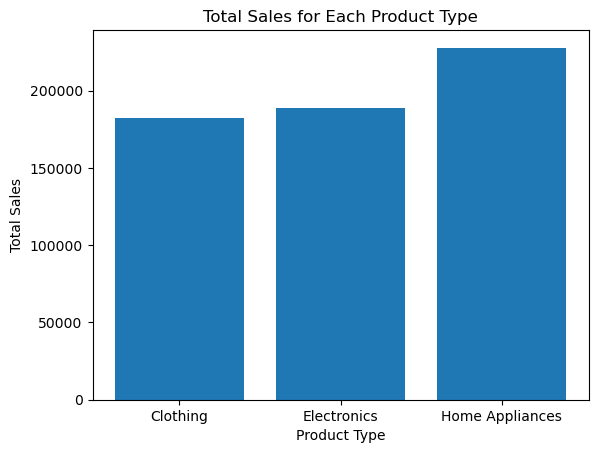

In [19]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

total_sales_per_product_type = sales_df.groupby('ProductType')['Sales'].sum()

# Plotting
plt.bar(total_sales_per_product_type.index, total_sales_per_product_type)
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Product Type')
plt.show()

#### 5.2. Plot a scatter plot to visualize the relationship between sales and region.

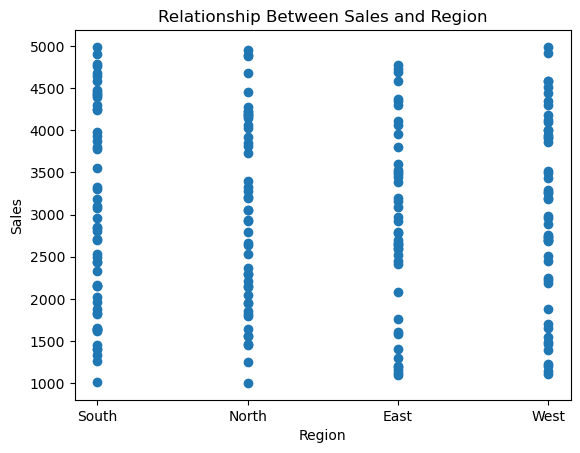

In [20]:
plt.scatter(sales_df['Region'], sales_df['Sales'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Relationship Between Sales and Region')
plt.show()

#### 5.3. Plot a line plot to visualize the total sales over different regions for each product type.

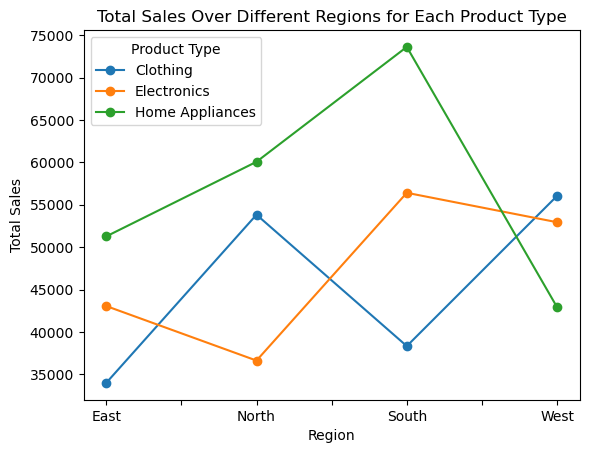

In [21]:
sales_by_region_product_type = pd.pivot_table(sales_df, values='Sales', index='Region', columns='ProductType', aggfunc=np.sum, fill_value=0)
sales_by_region_product_type.plot(kind='line', marker='o')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Different Regions for Each Product Type')
plt.legend(title='Product Type')
plt.show()